In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

d:\Data science ANN project\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
##Load the imbd dataset

max_features= 1000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)


#Print the shape of the data
print(f'Training data shape:{X_train.shape},Training labels shape:{y_train.shape}')
print(f'Testing data shape:{X_train.shape},Testing labels shape:{y_test.shape}')


d:\Data science ANN project\venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


Training data shape:(25000,),Training labels shape:(25000,)
Testing data shape:(25000,),Testing labels shape:(25000,)


In [3]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [4]:
##Inspect a sample review and its labels 
sample_review=X_train[0]
sample_label=y_train[0]

print(f"Sample review (as integers):{sample_review} ")
print(f"Sample label:{sample_label}")

Sample review (as integers):[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32] 
Sample label:1


In [5]:
max_len=500

X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)

In [6]:
##Train simple RNN
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len))
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

d:\Data science ANN project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [9]:
###Create an instance of EarlyStoppong Callback
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
earlystopping

In [10]:
##Train the model with early stopping
history=model.fit(
    X_train,y_train,epochs=10,batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 244ms/step - accuracy: 0.5806 - loss: 1625901.1250 - val_accuracy: 0.5744 - val_loss: 0.6678
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 332ms/step - accuracy: 0.6572 - loss: 0.6145 - val_accuracy: 0.5642 - val_loss: 0.6858
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.6604 - loss: 5.7534 - val_accuracy: 0.6384 - val_loss: 0.6225
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 219ms/step - accuracy: 0.6773 - loss: 0.5995 - val_accuracy: 0.6528 - val_loss: 0.6138
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 227ms/step - accuracy: 0.7129 - loss: 0.8345 - val_accuracy: 0.6872 - val_loss: 0.5766
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 218ms/step - accuracy: 0.6931 - loss: 659.4990 - val_accuracy: 0.6944 - val_loss: 0.5740
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 230ms/step - accuracy: 0.7729 - loss: 0.4905 - val_accuracy: 0.7722 - val_loss: 0.4838
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 225ms/step - accuracy: 

In [11]:
model.save('simple_rnn_imdb.h5')

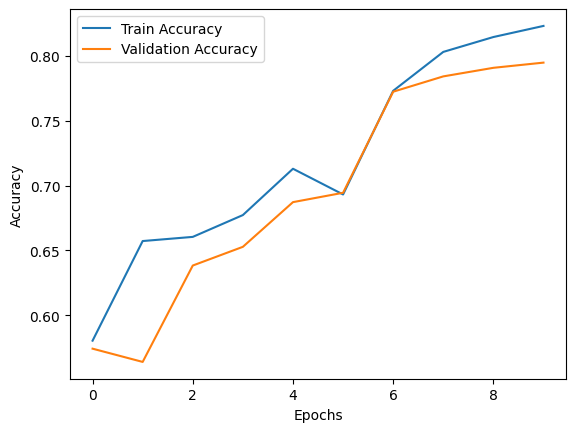

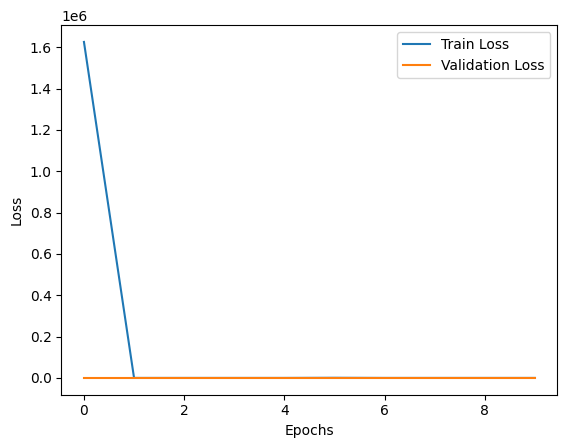

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('training_accuracy.png')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('validation_loss.png')
plt.show()


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load trained model
model = load_model("simple_rnn_imdb.h5")

# Load IMDB word index
word_index = imdb.get_word_index()

# Convert text to sequence
def text_to_sequence(text, word_index, maxlen=200):
    words = text.lower().split()
    seq = [word_index.get(word, 2) for word in words]  # 2 = unknown word
    return pad_sequences([seq], maxlen=maxlen)

# Example reviews
reviews = [
    "I loved this movie it was amazing",
    "The movie was boring and very slow"
]

# Predict
for review in reviews:
    seq = text_to_sequence(review, word_index)
    prediction = model.predict(seq)
    sentiment = "Positive 😊" if prediction[0][0] > 0.5 else "Negative 😞"
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}, Score: {prediction[0][0]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Review: I loved this movie it was amazing
Sentiment: Positive 😊, Score: 0.8240545988082886

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Review: The movie was boring and very slow
Sentiment: Positive 😊, Score: 0.8703255653381348

